In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 

from sympy import symbols
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit 

### Compton Scattering Polar Plot 

#### Data from Scattering 2

In [2]:
math.pi 
print(math.pi) 
math.cos 
print(math.cos)

3.141592653589793
<built-in function cos>


[2.         2.00001935 2.00007741 2.00017418 2.00030964 2.00048381
 2.00069669 2.00094826 2.00123853 2.00156749 2.00193514 2.00234148
 2.0027865  2.0032702  2.00379257 2.00435361 2.00495332 2.00559168
 2.00626869 2.00698435 2.00773864 2.00853156 2.00936311 2.01023326
 2.01114203 2.01208938 2.01307533 2.01409985 2.01516294 2.01626458
 2.01740477 2.01858349 2.01980073 2.02105649 2.02235074 2.02368348
 2.02505469 2.02646435 2.02791246 2.02939901 2.03092396 2.03248732
 2.03408906 2.03572917 2.03740763 2.03912443 2.04087955 2.04267297
 2.04450467 2.04637464 2.04828285 2.0502293  2.05221395 2.05423679
 2.05629781 2.05839697 2.06053426 2.06270966 2.06492314 2.06717469
 2.06946428 2.07179188 2.07415749 2.07656106 2.07900259 2.08148204
 2.08399939 2.08655461 2.08914769 2.09177859 2.09444729 2.09715376
 2.09989797 2.1026799  2.10549953 2.10835681 2.11125173 2.11418426
 2.11715436 2.12016201 2.12320718 2.12628984 2.12940995 2.13256749
 2.13576242 2.13899472 2.14226434 2.14557127 2.14891546 2.1522

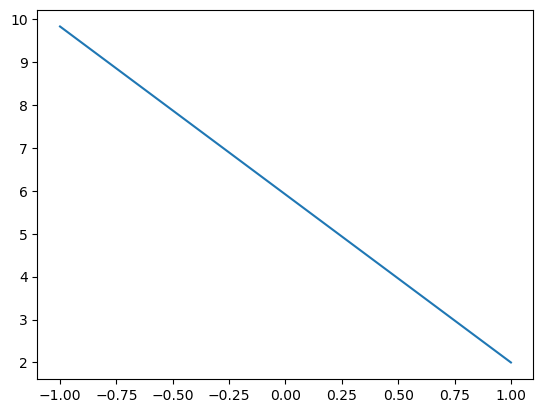

In [3]:
# Equation set up  
mev=2 

num_points = 1000 
a_values = np.linspace(0, np.pi, num_points) 
cos_values = np.cos(a_values) 

hv=mev/1+(mev/0.511)*(1-np.cos(a_values)) 
print (hv) 

plt.plot(cos_values,hv)

In [4]:
z=2 #Helium 
print(z)

r= 2.8179403262 * 10**-15 #m
print(r) 

mc= 0.511 #MeV
a= (hv)/(mc) 
print(a)

2
2.8179403262000004e-15
[ 3.91389432  3.9139322   3.91404582  3.91423518  3.91450028  3.91484112
  3.9152577   3.91575002  3.91631805  3.91696181  3.91768129  3.91847647
  3.91934736  3.92029393  3.92131619  3.92241412  3.92358771  3.92483695
  3.92616182  3.92756232  3.92903844  3.93059014  3.93221743  3.93392028
  3.93569868  3.93755261  3.93948205  3.94148698  3.94356739  3.94572325
  3.94795454  3.95026123  3.95264332  3.95510076  3.95763354  3.96024164
  3.96292502  3.96568367  3.96851754  3.97142662  3.97441088  3.97747029
  3.98060481  3.98381442  3.98709908  3.99045876  3.99389344  3.99740306
  4.00098761  4.00464704  4.00838132  4.01219041  4.01607427  4.02003287
  4.02406616  4.02817411  4.03235667  4.03661381  4.04094548  4.04535164
  4.04983224  4.05438725  4.05901661  4.06372028  4.06849822  4.07335037
  4.07827669  4.08327713  4.08835164  4.09350018  4.09872268  4.10401909
  4.10938938  4.11483347  4.12035133  4.12594288  4.13160809  4.13734689
  4.14315922  4.14904504  

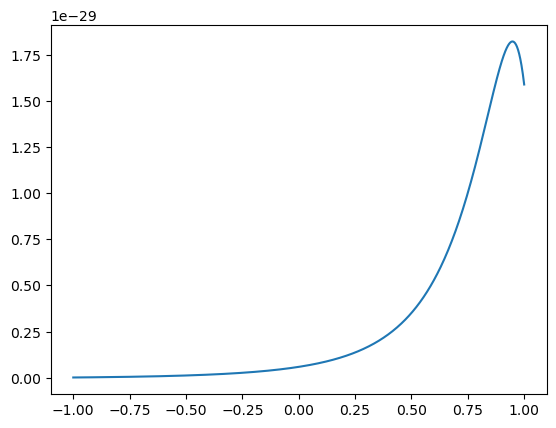

In [5]:
KN=z*(r**2)*((1/(1+a*(1-(np.cos(a_values)))))**2)*((1+((np.cos(a_values))**2))/2)*(1+(((a**2)*((1-(np.cos(a_values))**2)/((1+(np.cos(a_values))**2)*(1+a*(1-(np.cos(a_values)))))))))
KNB= KN*(1.0 * 10**28)
plt.plot(cos_values,KN)

C:\Users\Isikinz\AppData\Local\Temp\ipykernel_34580\2952379253.py:7: RuntimeWarning: divide by zero encountered in divide
  term4 = 1+((alpha**2 * (1 - cos_theta)**2) / ((1 + cos_theta)*(1+ alpha*(1-cos_theta))**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


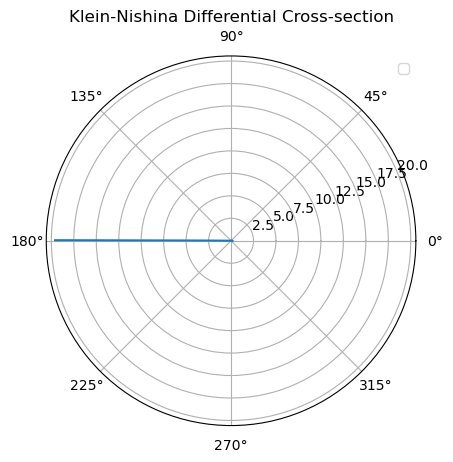

In [15]:
# Klein-Nishina 
def klein_nishina(theta, alpha, z, r0):
    cos_theta = np.cos(theta) 
    term1 = z*(r0**2)
    term2 = (1 / (1 + alpha * (1 - cos_theta)))**2
    term3 = (1 + cos_theta**2) / 2
    term4 = 1+((alpha**2 * (1 - cos_theta)**2) / ((1 + cos_theta)*(1+ alpha*(1-cos_theta))**2))
    d = term1 * term2 * term3 * term4 
    d2 = d*(1.0 * 10**28)
    return d2

# theta and alpha
theta = np.linspace(0, np.pi, 1000)  # angles from 0 to 360 degrees
alpha = (hv)/(mc)  

#Constants
r0 = 2.8179e-15  # Electron radius (m)
me_c2 = 0.511  # Electron rest mass energy (MeV)
z= 2 # Helium

# Compute the differential cross-section
d_sigma = klein_nishina(theta, alpha, z, r0)

# Plotting 
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, d_sigma)
ax.set_title('Klein-Nishina Differential Cross-section')
ax.legend()

plt.show()

#### Redefining

In [7]:
print(cos_values)

[ 1.          0.99999506  0.99998022  0.9999555   0.99992089  0.99987639
  0.999822    0.99975772  0.99968356  0.99959951  0.99950557  0.99940175
  0.99928805  0.99916446  0.999031    0.99888765  0.99873443  0.99857133
  0.99839835  0.9982155   0.99802278  0.99782019  0.99760773  0.9973854
  0.99715321  0.99691116  0.99665925  0.99639749  0.99612587  0.9958444
  0.99555308  0.99525192  0.99494091  0.99462007  0.99428939  0.99394887
  0.99359853  0.99323836  0.99286837  0.99248855  0.99209893  0.99169949
  0.99129025  0.9908712   0.99044235  0.99000371  0.98955528  0.98909706
  0.98862906  0.98815128  0.98766373  0.98716641  0.98665934  0.9861425
  0.98561591  0.98507957  0.9845335   0.98397768  0.98341214  0.98283687
  0.98225188  0.98165717  0.98105276  0.98043865  0.97981484  0.97918134
  0.97853816  0.9778853   0.97722277  0.97655057  0.97586872  0.97517722
  0.97447607  0.97376528  0.97304487  0.97231483  0.97157518  0.97082592
  0.97006706  0.96929861  0.96852057  0.96773295  0.96

In [8]:
z=2 #Helium 
#print(z)

r= 2.8179403262 * 10**-15 #m
#print(r) 

mc= 0.511 #MeV
a= (hv)/(mc) 
#print(a)

In [9]:
KN=z*(r**2)*((1/(1+a*(1-(cos_values))))**2)*((1+((cos_values)**2))/2)*(1+(((a**2)*((1-(cos_values)**2)/((1+(cos_values)**2)*(1+a*(1-(cos_values))))))))
KNB= KN*(1.0 * 10**28)
print(KNB)

[1.58815754e-01 1.58820850e-01 1.58836137e-01 1.58861600e-01
 1.58897219e-01 1.58942965e-01 1.58998801e-01 1.59064680e-01
 1.59140548e-01 1.59226344e-01 1.59321996e-01 1.59427426e-01
 1.59542548e-01 1.59667267e-01 1.59801479e-01 1.59945075e-01
 1.60097937e-01 1.60259937e-01 1.60430943e-01 1.60610813e-01
 1.60799398e-01 1.60996543e-01 1.61202084e-01 1.61415850e-01
 1.61637664e-01 1.61867341e-01 1.62104691e-01 1.62349515e-01
 1.62601610e-01 1.62860764e-01 1.63126760e-01 1.63399376e-01
 1.63678383e-01 1.63963545e-01 1.64254623e-01 1.64551371e-01
 1.64853538e-01 1.65160868e-01 1.65473100e-01 1.65789968e-01
 1.66111202e-01 1.66436528e-01 1.66765667e-01 1.67098335e-01
 1.67434248e-01 1.67773114e-01 1.68114641e-01 1.68458532e-01
 1.68804488e-01 1.69152206e-01 1.69501383e-01 1.69851711e-01
 1.70202881e-01 1.70554583e-01 1.70906504e-01 1.71258330e-01
 1.71609748e-01 1.71960440e-01 1.72310090e-01 1.72658381e-01
 1.73004996e-01 1.73349618e-01 1.73691929e-01 1.74031613e-01
 1.74368354e-01 1.747018

#### Polar Plot